<!-- dom:TITLE: Computational Physics Lectures: Random walks, Brownian motion and the Metropolis algorithm -->
# Computational Physics Lectures: Random walks, Brownian motion and the Metropolis algorithm
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Aug 23, 2017**

Copyright 1999-2017, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Why Markov chains, Brownian motion and the Metropolis algorithm

We want to study a physical system which evolves towards equilibrium, from som given  initial conditions.
Recall the simple example of particles in a box. At an initial time $t_0$ all particles are in the left half of the box. Thereafter they are allowed to diffuse into the two halves of the box.

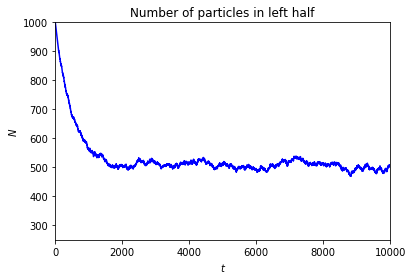

In [1]:
%matplotlib inline

#!/usr/bin/env python
from  matplotlib import pyplot as plt
from math import exp
import numpy as np
import random

# initial number of particles
N0 = 1000
MaxTime = 10*N0
values = np.zeros(MaxTime)
time = np.zeros(MaxTime)
random.seed()
# initial number of particles in left half
nleft = N0
for t in range (0, MaxTime, 1):
    if N0*random.random() <= nleft:
       nleft -= 1
    else:
       nleft += 1
    time[t] = t
    values[t] = nleft

# Finally we plot the results
plt.plot(time, values,'b-')
plt.axis([0,MaxTime, N0/4, N0])
plt.xlabel('$t$')
plt.ylabel('$N$')
plt.title('Number of particles in left half')
plt.savefig('box.pdf')
plt.show()

## Why Markov chains, Brownian motion and the Metropolis algorithm

* We want to study a physical system which evolves towards equilibrium, from given  initial conditions.

* We start with a PDF $w(x_0,t_0)$  and we want to understand how the system evolves with time.

* We want to reach a situation where after a given number of time steps we obtain a steady state. This means that the system reaches its most likely state (equilibrium situation)

* Our PDF is normally a multidimensional object whose normalization constant is impossible to find.

* Analytical calculations from $w(x,t)$ are not possible.

* To sample directly from from $w(x,t)$ is not possible/difficult.

* The transition probability $W$ is also not  known.

* How can we establish that we have reached a steady state?   Sounds impossible!

**Use Markov chain Monte Carlo**

<!-- !split  -->
## Brownian motion and Markov processes
A Markov process is a random walk with a selected probability for making a
move. The new move is independent of the previous history of the system.

The Markov process is used repeatedly in Monte Carlo simulations in order to generate
new random states.

The reason for choosing a Markov process is that when it is run for a
long enough time starting with a random state, we will eventually reach the most likely state of the system.

In thermodynamics, this means that after a certain number of Markov processes
we reach an equilibrium distribution.

This mimicks the way a real system reaches
its most likely state at a given temperature of the surroundings.

<!-- !split  -->
## Brownian motion and Markov processes, Ergodicity and Detailed balance

To reach this distribution, the Markov process needs to obey two important conditions, that of
**ergodicity** and **detailed balance**. These conditions impose then constraints on our algorithms
for accepting or rejecting new random states.


The Metropolis algorithm discussed here
abides to both these constraints.

The Metropolis algorithm is widely used in Monte Carlo
simulations and the understanding of it rests within
the interpretation of random walks and Markov processes.

<!-- !split  -->
## Brownian motion and Markov processes, jargon

In a random walk one defines a mathematical entity called a **walker**, 
whose  attributes
completely define the state of the system in question. 

The state of the system  can refer to any physical quantities,
from the vibrational state of a molecule specified by a set of quantum numbers, 
to the brands of coffee in your favourite supermarket.


The walker moves in an appropriate state space by a combination of 
deterministic and random displacements from its previous
position.

This sequence of steps forms a **chain**.

<!-- !split  -->
## Brownian motion and Markov processes, sequence of ingredients

* We want to study a physical system which evolves towards equilibrium, from given  initial conditions.

* Markov chains are intimately linked with the physical process of diffusion. 

* From a Markov chain we can then derive the conditions for detailed balance and ergodicity. These are the conditions needed for obtaining a steady state.

* The widely used algorithm for doing this is the so-called Metropolis algorithm, in its refined form the Metropolis-Hastings algorithm.

## Applications: almost every field in science

* Financial engineering, see for example Patriarca *et al*, Physica **340**, [page 334 (2004)](http://www.sciencedirect.com/science/article/pii/S0378437104004327).

* Neuroscience, see for example Lipinski, Physics Medical Biology **35**, [page 441 (1990)](http://iopscience.iop.org/article/10.1088/0031-9155/35/3/012/meta;jsessionid=FA91B191036E1F10948F7C42B6A6D295.c1) or Farnell and Gibson, Journal of Computational Physics **208**, [page 253 (2005)](http://www.sciencedirect.com/science/article/pii/S0021999105001087)

* Tons of applications in physics

* and chemistry

* and biology, medicine

* Nobel prize in economy to Black and Scholes

$$
\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2} V}{\partial S^{2}}+rS\frac{\partial V}{\partial S}-rV=0.
$$

The Black and Scholes equation is a partial differential equation, which describes the price
of the option over time. It is a diffusion equation with a random term.

The list of applications is endless

## A simple example (close to project 4) and some more jargon

The obvious case is that of a random walker on a one-, or two- or three-dimensional lattice
(dubbed coordinate space hereafter).

Consider a system whose energy is defined by the orientation of single spins.
Consider the state $i$, with given energy $E_i$ represented by the following $N$ spins

$$
\begin{array}{cccccccccc}
\uparrow&\uparrow&\uparrow&\dots&\uparrow&\downarrow&\uparrow&\dots&\uparrow&\downarrow\\
1&2&3&\dots& k-1&k&k+1&\dots&N-1&N\end{array}
$$

We may be  interested in the transition with one single  spinflip to a new state $j$ with energy $E_j$

$$
\begin{array}{cccccccccc}
\uparrow&\uparrow&\uparrow&\dots&\uparrow&\uparrow&\uparrow&\dots&\uparrow&\downarrow\\
1&2&3&\dots& k-1&k&k+1&\dots&N-1&N\end{array}
$$

This change from one microstate $i$ (or spin configuration)  to another microstate $j$ is the
**configuration space**  analogue to a random walk on a lattice. Instead of jumping from
one place to another in space, we 'jump' from one microstate to another.

## Markov processes
A Markov process allows in principle for a microscopic description of Brownian motion.
As with the random walk studied in the previous section, we consider a particle 
which moves along the  $x$-axis in the form of a series of jumps with step length 
$\Delta x = l$. Time and space are discretized and the subsequent moves are
statistically independent, i.e., the new move depends only on the previous step
and not on the results from earlier trials. 
We start at a position $x=jl=j\Delta x$ and move to 
a new position $x =i\Delta x$ during a step $\Delta t=\epsilon$, where 
$i\ge  0$ and $j\ge 0$ are integers. 
The original probability distribution function (PDF) of the particles is given by  
$w_i(t=0)$ where $i$ refers to a specific position on the grid in


The function $w_i(t=0)$ is now the discretized version of $w(x,t)$.
We can regard the discretized PDF as a vector.

## Markov processes
For the Markov process we have a transition probability from a position
$x=jl$ to a position $x=il$ given by

$$
W_{ij}(\epsilon)=W(il-jl,\epsilon)=\left\{\begin{array}{cc}\frac{1}{2} & |i-j| = 1\\
             0 & \mathrm{else} \end{array} \right. ,
$$

where $W_{ij}$ is normally called 
the transition probability and we can represent it, see below,
as a matrix. 
**Here we have specialized to a case where the transition probability is known**.

Our new PDF $w_i(t=\epsilon)$ is now related to the PDF at
$t=0$ through the relation

$$
w_i(t=\epsilon) =\sum_{j} W(j\rightarrow i)w_j(t=0).
$$

This equation represents the discretized time-development of an original 
PDF with equal probability of jumping left or right.



## Markov processes, the probabilities

Since both $W$ and $w$ represent probabilities, they have to be normalized, i.e., we require
that at each time step we have

$$
\sum_i w_i(t) = 1,
$$

and

$$
\sum_j W(j\rightarrow i) = 1,
$$

which applies for all $j$-values.
The further constraints are
$0 \le W_{ij} \le 1$  and  $0 \le w_{j} \le 1$.
Note that the probability for remaining at the same place is in general 
not necessarily equal zero.



## Markov processes
The time development of our initial PDF can now be represented through the action of
the transition probability matrix applied $n$ times. At a 
time  $t_n=n\epsilon$ our initial distribution has developed into

$$
w_i(t_n) = \sum_jW_{ij}(t_n)w_j(0),
$$

and defining

$$
W(il-jl,n\epsilon)=(W^n(\epsilon))_{ij}
$$

we obtain

$$
w_i(n\epsilon) = \sum_j(W^n(\epsilon))_{ij}w_j(0),
$$

or in matrix form

<!-- Equation labels as ordinary links -->
<div id="eq:wfinal"></div>

$$
\begin{equation} \label{eq:wfinal} \tag{1}
   \hat{w}(n\epsilon) = \hat{W}^n(\epsilon)\hat{w}(0).
\end{equation}
$$

## An Illustrative Example

The following simple example may help in understanding the meaning of 
the transition matrix $\hat{W}$ and the vector $\hat{w}$.
Consider the $4\times 4$ matrix $\hat{W}$

$$
\hat{W} = \left(\begin{array}{cccc} 1/4 & 1/9 & 3/8 & 1/3 \\                   
                                       2/4 & 2/9 & 0 & 1/3\\                   
                                       0   & 1/9 & 3/8 & 0\\
                                       1/4 & 5/9&  2/8 & 1/3 \end{array} \right),
$$

and we choose our initial state as

$$
\hat{w}(t=0)=  \left(\begin{array}{c} 1\\                   
                                 0\\
                                 0 \\                   
                                 0 \end{array} \right).
$$

## An Illustrative Example
We note that both the vector and the matrix are properly normalized. Summing the vector elements gives one and
summing over columns for the matrix results also in one.  Furthermore, the largest eigenvalue is one.
We act then on $\hat{w}$ with $\hat{W}$.
The first iteration is

$$
\hat{w}(t=\epsilon) = \hat{W}\hat{w}(t=0),
$$

resulting in

$$
\hat{w}(t=\epsilon)=  \left(\begin{array}{c} 1/4\\                   
                                1/2 \\
                                0 \\                   
                                1/4 \end{array} \right).
$$

## An Illustrative Example, next step

The next iteration results in

$$
\hat{w}(t=2\epsilon) = \hat{W}\hat{w}(t=\epsilon),
$$

resulting in

$$
\hat{w}(t=2\epsilon)=  \left(\begin{array}{c} 0.201389\\
   0.319444 \\
   0.055556 \\
   0.423611 \end{array} \right).
$$

Note that the vector $\hat{w}$ is always normalized to $1$.


## An Illustrative Example, the steady state
We find the steady state of the system by solving the set of equations

$$
w(t=\infty) = Ww(t=\infty),
$$

which is an eigenvalue problem with eigenvalue equal to **one**!
This set of equations reads

$$
W_{11}w_1(t=\infty) +W_{12}w_2(t=\infty) +W_{13}w_3(t=\infty)+ W_{14}w_4(t=\infty)=w_1(t=\infty) \nonumber
$$

$$
W_{21}w_1(t=\infty) + W_{22}w_2(t=\infty) + W_{23}w_3(t=\infty)+ W_{24}w_4(t=\infty)=w_2(t=\infty) \nonumber
$$

$$
W_{31}w_1(t=\infty) + W_{32}w_2(t=\infty) + W_{33}w_3(t=\infty)+ W_{34}w_4(t=\infty)=w_3(t=\infty) \nonumber
$$

$$
W_{41}w_1(t=\infty) + W_{42}w_2(t=\infty) + W_{43}w_3(t=\infty)+ W_{44}w_4(t=\infty)=w_4(t=\infty) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} 
\label{_auto1} \tag{2}
\end{equation}
$$

with the constraint that

$$
\sum_i w_i(t=\infty) = 1,
$$

yielding as solution

$$
\hat{w}(t=\infty)=  \left(\begin{array}{c}0.244318 \\                   
                                 0.319602 \\  0.056818 \\  0.379261 \end{array} \right).
$$

## An Illustrative Example, iterative steps

The table here  demonstrates the convergence as a function of the number of iterations or
time steps. After  twelve iterations we have reached the exact value with six leading digits. 

<table border="1">
<thead>
<tr><th align="center">     Iteration     </th> <th align="center"> $w_1$  </th> <th align="center"> $w_2$  </th> <th align="center"> $w_3$  </th> <th align="center"> $w_4$  </th> </tr>
</thead>
<tbody>
<tr><td align="right">   0                      </td> <td align="left">   1.000000    </td> <td align="left">   0.000000    </td> <td align="left">   0.000000    </td> <td align="left">   0.000000    </td> </tr>
<tr><td align="right">   1                      </td> <td align="left">   0.250000    </td> <td align="left">   0.500000    </td> <td align="left">   0.000000    </td> <td align="left">   0.250000    </td> </tr>
<tr><td align="right">   2                      </td> <td align="left">   0.201389    </td> <td align="left">   0.319444    </td> <td align="left">   0.055556    </td> <td align="left">   0.423611    </td> </tr>
<tr><td align="right">   3                      </td> <td align="left">   0.247878    </td> <td align="left">   0.312886    </td> <td align="left">   0.056327    </td> <td align="left">   0.382909    </td> </tr>
<tr><td align="right">   4                      </td> <td align="left">   0.245494    </td> <td align="left">   0.321106    </td> <td align="left">   0.055888    </td> <td align="left">   0.377513    </td> </tr>
<tr><td align="right">   5                      </td> <td align="left">   0.243847    </td> <td align="left">   0.319941    </td> <td align="left">   0.056636    </td> <td align="left">   0.379575    </td> </tr>
<tr><td align="right">   6                      </td> <td align="left">   0.244274    </td> <td align="left">   0.319547    </td> <td align="left">   0.056788    </td> <td align="left">   0.379391    </td> </tr>
<tr><td align="right">   7                      </td> <td align="left">   0.244333    </td> <td align="left">   0.319611    </td> <td align="left">   0.056801    </td> <td align="left">   0.379255    </td> </tr>
<tr><td align="right">   8                      </td> <td align="left">   0.244314    </td> <td align="left">   0.319610    </td> <td align="left">   0.056813    </td> <td align="left">   0.379264    </td> </tr>
<tr><td align="right">   9                      </td> <td align="left">   0.244317    </td> <td align="left">   0.319603    </td> <td align="left">   0.056817    </td> <td align="left">   0.379264    </td> </tr>
<tr><td align="right">   10                     </td> <td align="left">   0.244318    </td> <td align="left">   0.319602    </td> <td align="left">   0.056818    </td> <td align="left">   0.379262    </td> </tr>
<tr><td align="right">   11                     </td> <td align="left">   0.244318    </td> <td align="left">   0.319602    </td> <td align="left">   0.056818    </td> <td align="left">   0.379261    </td> </tr>
<tr><td align="right">   12                     </td> <td align="left">   0.244318    </td> <td align="left">   0.319602    </td> <td align="left">   0.056818    </td> <td align="left">   0.379261    </td> </tr>
<tr><td align="right">   $\hat{w}(t=\infty)$    </td> <td align="left">   0.244318    </td> <td align="left">   0.319602    </td> <td align="left">   0.056818    </td> <td align="left">   0.379261    </td> </tr>
</tbody>
</table>



## An Illustrative Example, what does it mean?

We have after $t$-steps

$$
\hat{w}(t) = \hat{W}^t\hat{w}(0),
$$

with $\hat{w}(0)$ the distribution at $t=0$ and $\hat{W}$ representing the 
transition probability matrix.



## An Illustrative Example, understanding the basics

We can always expand $\hat{w}(0)$ in terms of the right eigenvectors 
$\hat{v}$ of $\hat{W}$ as

$$
\hat{w}(0)  = \sum_i\alpha_i\hat{v}_i,
$$

resulting in

$$
\hat{w}(t) = \hat{W}^t\hat{w}(0)=\hat{W}^t\sum_i\alpha_i\hat{v}_i=
\sum_i\lambda_i^t\alpha_i\hat{v}_i,
$$

with $\lambda_i$ the $i^{\mathrm{th}}$ eigenvalue corresponding to  
the eigenvector $\hat{v}_i$. 

If we assume that $\lambda_0$ is the largest eigenvector we see that in the limit $t\rightarrow \infty$,
$\hat{w}(t)$ becomes proportional to the corresponding eigenvector 
$\hat{v}_0$. This is our steady state or final distribution.



## Simple c++ program to perform the above calculations
The c++ program we have included here (using Armadillo) performs the above operations
for, in this case, a $5\times 5$ matrix. The largest eigenvalue is $1$.

        #include <iostream>
        #include "armadillo"
        using namespace arma;
        using namespace std;
        
        int main()
        {
          int dim = 5;
          mat W = zeros<mat>(dim,dim);
          vec wold = zeros<mat>(dim);
          vec wnew = zeros<mat>(dim);
          vec eigenvector = zeros<mat>(dim);
          // Initializing the first vector
          wold(0) = 1.0;
          // Setting up the stochastic matrix W
          W(0,0) = 0.; W(0,1) = 0.; W(0,2) = 0.25; W(0,3) = 0.0;   W(0,4) = 0.;   
          W(1,0) = 0.; W(1,1) = 0.; W(1,2) = 0.25; W(1,3) = 0.; W(1,4) = 0.0;     
          W(2,0) = 0.5; W(2,1) = 1.0; W(2,2) = 0.; W(2,3) = 0.5; W(2,4) = 0.;       
          W(3,0) = 0.0; W(3,1) = 0.; W(3,2) = 0.25; W(3,3) = 0.;  W(3,4) = 0.;      
          W(4,0) = 0.5; W(4,1) = 0.; W(4,2) = 0.25; W(4,3) = 0.5;  W(4,4) = 1.0;      
          double eps = 1.0E-10;
          W.print("W =");
          double difference  = norm(wold-wnew, 2);
          int count = 0; 
          do{
            // Multiplying the old vector with the transition probability
            count += 1; 
            wnew = W*wold;
            difference  = norm(wold-wnew, 2);
            wold = wnew;
            cout << "Iteration number = " << count << endl;
            wnew.print("New vector =");
          } while(difference > eps);
        
          // Getting the eigenvectors and eigenvalues of the stochastic matrix
          cx_vec eigval;
          eig_gen(eigval, W);
          eigval.print("Eigenvalues=");
          return 0;
        }


## Entropy and the most likely state

In [2]:
# 1D-randomwalk: A walker makes several steps,
# with a given number of walks pr. trial.
# It computes the entropy by filling in bins with counts

import numpy, sys, math

def mc_trial(number_walks,move_probability,walk_cum,walk2_cum, probability):
    """
    Do a MonteCarlo trial, that is,
    random-walk one particle.

    Input:
    - number_walks:     Number of steps to walk the particle
    - move_probability: Probability that the particle
                        will step right when doing a step
    - walk_cum:         Numpy-array of length number_walks + 1,
                        containing the sum of the position
                        of the particles as a function of time
                        (usefull to calculate mean pos. as a function
                        of time)
    - walk2_cum:        Same as walk_cum, but with the sum of the
                        positions squared
    - probability:      Number of times each gridpoint is hit

    Output: As walk_cum, walk2_cum, and probability are (pointers to)
    numpy arrays, they are altered also in the calling function.
    """
    #Initial pos. As walk_cum[0]=walk2_cum[0] = 0.0
    #by initialization, it is uneccessary to add this step to
    #the arrays...
    pos = 0;
    
    for walk in xrange(number_walks+1):
        if numpy.random.random() <= move_probability:
            pos += 1
        else:
            pos -= 1
        walk_cum[walk]   += pos
        walk2_cum[walk]  += pos**2
        #Zero-position of the array is the leftmost
        #end of the grid
        probability[pos+number_walks] += 1

def mc_sample(length,trials, number_walks, move_probability):
    """
    Generate the probability distribution for finding
    a walker at a gridpoint, after a number of walks on a
    1d lattice with wrap-around boundary conditions

    Input:
    - length: Lattice-points away from x=0
    - trials: Number of MonteCarlo trials (number of walkers)
    - move_probability: Probability of moving right

    Output:
    Normalized probability of finding a walker on a
    specific grid position
    """

    #Grid position of every walker
    x = numpy.zeros(trials,numpy.int)

    #Loop over timesteps and walkers,
    #and find the walkers "ending positions"
    for t in xrange(number_walks):
        for i in xrange(trials):
            if numpy.random.random() <= move_probability:
                x[i] += 1
                #Wraparound?
                if x[i] > length:
                    x[i] = -length
            else:
                x[i] -= 1
                if x[i] < -length:
                    x[i] = +length
    
    #Calculate the probability of finding a walker
    #each grid-position
    probability = numpy.zeros(2*length+1)
    for i in xrange(len(probability)):
        pos = i-length
        #count number of occurences of this pos i x array
        count = 0
        for j in xrange(len(x)):
            if x[j] == pos:
                count += 1
        #Normalize and save
        probability[i] = count/float(trials)
    return probability

#Main program

length               =   10
trials               =   100000
number_walks         =   100
move_probability     =  0.5

#Do the MC
probability = mc_sample(length,trials,number_walks,move_probability);

#Not reliable: ln(0)
#entropy = - numpy.sum(probability*numpy.log(probability))

entropy = 0.0
for i in xrange(len(probability)):
    if probability[i] > 0.0:
        entropy -= probability[i]*math.log(probability[i])

print "Timesteps             =",number_walks
print "Walkers (num. trials) =",trials
print "Entropy               =",entropy
print
if len(probability) <= 101:
    print "Probability distribution (Flat => high entropy):"
    print probability
else:
    print "Probability distribution to big to print"

## The Metropolis Algorithm and Detailed Balance

Let us recapitulate some of our results about Markov chains and random walks.

  * The time development of our PDF $w(t)$, after 

one time-step from $t=0$ is given by

$$
w_i(t=\epsilon) = W(j\rightarrow i)w_j(t=0).
$$

This equation represents the discretized time-development of an original 
PDF.  We can rewrite this as a

$$
w_i(t=\epsilon) = W_{ij}w_j(t=0).
$$

with the transition matrix $W$ for a random walk given by

$$
W_{ij}(\epsilon)=W(il-jl,\epsilon)=\left\{\begin{array}{cc}\frac{1}{2} & |i-j| = 1\\
                                             0 & \mathrm{else} \end{array} \right.
$$

## The Metropolis Algorithm and Detailed Balance

We call $W_{ij}$ for the transition probability and we represent it
as a matrix. 
  * Both  $W$ and $w$ represent probabilities and they have to be normalized, meaning that at each time step we have

$$
\sum_i w_i(t) = 1,
$$

and

$$
\sum_j W(j\rightarrow i) = 1.
$$

Here we have written the previous matrix $W_{ij}=W(j\rightarrow i)$.



## The Metropolis Algorithm and Detailed Balance

The further constraints are
$0 \le W_{ij} \le 1$  and  $0 \le w_{j} \le 1$.
  * We can thus write the action of $W$ as

$$
w_i(t+1) = \sum_jW_{ij}w_j(t),
$$

or as vector-matrix relation

$$
\hat{w}(t+1) = \hat{W\hat{w}}(t),
$$

and if we have that $||\hat{w}(t+1)-\hat{w}(t)||\rightarrow 0$, we say that 
we have reached the most likely state of the system, the so-called steady state or equilibrium state.



## The Metropolis Algorithm and Detailed Balance

Another way of phrasing this is

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
w(t=\infty) = Ww(t=\infty). 
\label{_auto2} \tag{3}
\end{equation}
$$

## The Metropolis Algorithm and Detailed Balance

The question then is how can we model anything under such a severe lack of knowledge? The Metropolis algorithm comes to our rescue here. Since $W(j\rightarrow i)$ is unknown, we model it as the product of two probabilities, 
a probability for accepting the proposed move from the state $j$ to the state $j$, and a probability for making the transition to the state $i$ being in the state $j$. We label these probabilities $A(j\rightarrow i)$ and $T(j\rightarrow i)$, respectively.  Our total transition probability is then

$$
W(j\rightarrow i)=T(j\rightarrow i)A(j\rightarrow i).
$$

The algorithm can then be expressed as

  * We make a suggested move to the new state $i$ with some transition or moving probability $T_{j\rightarrow i}$.

  * We accept this move to the new state with an acceptance probability $A_{j \rightarrow i}$. The new state $i$ is in turn used as our new starting point for the next move.  We reject this proposed moved with a $1-A_{j\rightarrow i}$ and the original state $j$ is used again as a sample.



## The Metropolis Algorithm and Detailed Balance

We wish to derive the required properties of the probabilities $T$ and $A$ such that
$w_i^{(t\rightarrow \infty)} \rightarrow w_i$, starting
from any distribution, will lead us to the correct distribution.

We can now derive the dynamical process towards 
equilibrium. To obtain this equation we note that after $t$ time steps the probability for being in a state $i$ is related 
to the probability of being in a state $j$ and performing a transition to the new state together with the probability of actually being in the state $i$ and making a move to any of the possible states $j$ from the previous time step.



## The Metropolis Algorithm and Detailed Balance

We can express this as, assuming that $T$ and $A$ are time-independent,

$$
w_i(t+1) = \sum_j \left [
w_j(t)T_{j\rightarrow i} A_{j\rightarrow i} 
+w_i(t)T_{i\rightarrow j}\left ( 1- A_{i\rightarrow j} \right)
\right ] \,.
$$

## The Metropolis Algorithm and Detailed Balance

All probabilities are normalized, meaning that 
$\sum_j T_{i\rightarrow j} = 1$. Using the latter, we can rewrite the previous equation as

$$
w_i(t+1) = w_i(t) +
 \sum_j \left [
w_j(t)T_{j\rightarrow i} A_{j\rightarrow i} 
-w_i(t)T_{i\rightarrow j}A_{i\rightarrow j}\right ] \,,
$$

which can be rewritten as

$$
w_i(t+1)-w_i(t) =  \sum_j \left [w_j(t)T_{j\rightarrow i} A_{j\rightarrow i} 
-w_i(t)T_{i\rightarrow j}A_{i\rightarrow j}\right ] .
$$

## The Metropolis Algorithm and Detailed Balance

The last equation is very similar to the so-called Master equation, which relates the temporal dependence of 
a PDF $w_i(t)$ to various transition rates. The equation can be derived from the so-called 
Chapman-Einstein-Enskog-Kolmogorov equation. The equation is given as

<!-- Equation labels as ordinary links -->
<div id="eq:masterequation"></div>

$$
\begin{equation}
\label{eq:masterequation} \tag{4}
\frac{d w_i(t)}{dt} = \sum_j\left[ W(j\rightarrow i)w_j-W(i\rightarrow j)w_i\right],
\end{equation}
$$

which simply states that the rate at which the systems moves from a state $j$
to a final state $i$ (the first term on the right-hand side of the last equation) is balanced by the rate at which the system undergoes transitions from the state $i$ to a state $j$ (the second term). If we have reached the so-called steady state, then the temporal development is zero. This  means that in equilibrium we have

$$
\frac{d w_i(t)}{dt} = 0.
$$

## The Metropolis Algorithm and Detailed Balance

In the limit $t\rightarrow \infty$ we require that the  two distributions $w_i(t+1)=w_i$ and $w_i(t)=w_i$
and we have

$$
\sum_j w_jT_{j\rightarrow i} A_{j\rightarrow i}= \sum_j w_iT_{i\rightarrow j}A_{i\rightarrow j},
$$

which is the condition for balance when the most likely state (or steady state) has been reached.
We see also that the right-hand side  can be  rewritten as

$$
\sum_j w_iT_{i\rightarrow j}A_{i\rightarrow j}= \sum_j w_iW_{i\rightarrow j},
$$

and using the property that $\sum_j W_{i\rightarrow j}=1$, we can rewrite our equation
as

$$
w_i= \sum_j w_jT_{j\rightarrow i} A_{j\rightarrow i}= \sum_j w_j W_{j\rightarrow i},
$$

which is nothing but the standard equation for a Markov chain when the steady state has been reached.



## The Metropolis Algorithm and Detailed Balance

However, the condition that the rates should equal each other is in general not sufficient
to guarantee that we, after many simulations, generate the correct distribution.
We may risk to end up with so-called cyclic solutions. To avoid this
we therefore introduce an additional condition, namely that of detailed balance

$$
W(j\rightarrow i)w_j= W(i\rightarrow j)w_i.
$$

These equations were derived by Lars Onsager when studying irreversible processes.
At equilibrium detailed balance gives thus

$$
\frac{W(j\rightarrow i)}{W(i\rightarrow j)}=\frac{w_i}{w_j}.
$$

Rewriting the last equation in terms of our transition probabilities $T$ and 
acceptance probobalities $A$ we obtain

$$
w_j(t)T_{j\rightarrow i}A_{j\rightarrow i}= w_i(t)T_{i\rightarrow j}A_{i\rightarrow j}.
$$

## The Metropolis Algorithm and Detailed Balance

Since we normally have an expression 
for the probability distribution functions $w_i$,  we can rewrite the last equation as

$$
\frac{T_{j\rightarrow i}A_{j\rightarrow i}}{T_{i\rightarrow j}A_{i\rightarrow j}}= \frac{w_i}{w_j}.
$$

## The Metropolis Algorithm and Detailed Balance

In statistical physics this condition ensures that it is e.g., the 
Boltzmann distribution which is generated when equilibrium is reached.

We introduce  now the Boltzmann distribution

$$
w_i= \frac{\exp{(-\beta(E_i))}}{Z},
$$

which states that the probability of finding the system in a state $i$ with energy $E_i$ 
at an inverse temperature $\beta = 1/k_BT$ is $w_i\propto \exp{(-\beta(E_i))}$.
The denominator $Z$ is a normalization constant which ensures that the sum of all
probabilities is normalized to one. It is defined as the sum of probabilities over all microstates
$j$ of the system

$$
Z=\sum_j \exp{(-\beta(E_i))}.
$$

## The Metropolis Algorithm and Detailed Balance

From the partition function we can in principle generate all interesting quantities
for a given system in equilibrium with its surroundings at a temperature $T$.

With the probability distribution given by the Boltzmann distribution we are now in a position
where we can generate expectation values for a given variable $A$ through the
definition

$$
\langle A \rangle = \sum_jA_jw_j=
    \frac{\sum_jA_j\exp{(-\beta(E_j)}}{Z}.
$$

In general, most systems have an infinity of microstates making thereby the computation
of $Z$ practically impossible and 
a brute force Monte Carlo calculation over a given number of randomly selected microstates
may therefore not yield those microstates which are important 
at equilibrium. 
To select the most important contributions we need to  
use the condition for detailed balance. Since this is just given by the ratios of probabilities,
we never need to evaluate the partition function $Z$.



## The Metropolis Algorithm and Detailed Balance

For the 
Boltzmann distribution, detailed balance results in

$$
\frac{w_i}{w_j}= \exp{(-\beta(E_i-E_j))}.
$$

Let us now specialize to a system whose energy is defined by the orientation of single spins.
Consider the state $i$, with given energy $E_i$ represented by the following $N$ spins

$$
\begin{array}{cccccccccc}
\uparrow&\uparrow&\uparrow&\dots&\uparrow&\downarrow&\uparrow&\dots&\uparrow&\downarrow\\
1&2&3&\dots& k-1&k&k+1&\dots&N-1&N\end{array}
$$

## The Metropolis Algorithm and Detailed Balance

We are interested in the transition with one single  spinflip to a new state $j$ with energy $E_j$

$$
\begin{array}{cccccccccc}
\uparrow&\uparrow&\uparrow&\dots&\uparrow&\uparrow&\uparrow&\dots&\uparrow&\downarrow\\
1&2&3&\dots& k-1&k&k+1&\dots&N-1&N\end{array}
$$

This change from one microstate $i$ (or spin configuration)  to another microstate $j$ is the
configuration space analogue to a random walk on a lattice. Instead of jumping from 
one place to another in space, we 'jump' from one microstate to another.



## The Metropolis Algorithm and Detailed Balance

However, the selection of states has to generate a final distribution which is the
Boltzmann distribution. This is again the same we saw for a random walker, for the discrete case we had 
always a binomial distribution, whereas for the continuous case we had a normal distribution.
The way we sample configurations should result, when equilibrium is established, in the 
Boltzmann distribution. Else, our algorithm for selecting microstates is wrong.


As stated above, we do in general not know the closed-form expression of the transition rate and we are free to model it as
     $W(i\rightarrow j)=T(i\rightarrow j)A(i\rightarrow j)$.
Our ratio between probabilities gives us

$$
\frac{A_{j\rightarrow i}}{A_{i\rightarrow j}}= \frac{w_iT_{i\rightarrow j}}{w_jT_{j\rightarrow i}}.
$$

The simplest form of the Metropolis algorithm (sometimes called for brute force Metropolis) assumes that 
the transition probability $T(i\rightarrow j)$ is symmetric, implying that $T(i\rightarrow j)=T(j\rightarrow i)$.



## The Metropolis Algorithm and Detailed Balance

We obtain then (using the Boltzmann distribution)

$$
\frac{A(j\rightarrow i)}{A(i\rightarrow j)}= \exp{(-\beta(E_i-E_j))} .
$$

We are in this case interested in a new state $E_j$ whose energy is lower than 
$E_i$, viz., $\Delta E = E_j-E_i \le 0$. A simple test would then be to accept only those
microstates which lower the energy.  
Suppose we have ten microstates with energy $E_0 \le E_1 \le E_2 \le E_3 \le \dots \le E_9$.
Our desired energy is $E_0$.



## The Metropolis Algorithm and Detailed Balance

At a given temperature $T$ we start our simulation by randomly choosing state
$E_9$. Flipping spins we may then find a path from $E_9\rightarrow E_8 \rightarrow E_7 \dots \rightarrow E_1 \rightarrow E_0$. 
This would however lead to biased statistical averages since it would violate the ergodic hypothesis discussed
in the previous section. This principle states  that 
it should be possible for any Markov process to reach every possible state of the system
from any starting point if the simulations is carried out for a long enough time.

Any state in a Boltzmann distribution has a probability different from zero and if such 
a state cannot be reached from a given starting point, then the system is not ergodic.
This means that another possible path to $E_0$ could be 
$E_9\rightarrow E_7 \rightarrow E_8 \dots \rightarrow E_9 \rightarrow E_5 \rightarrow E_0$ and so forth.
Even though such a path could have a negligible probability it is still a possibility, and if
we simulate long enough it should be included in our computation of an expectation value.



## The Metropolis Algorithm and Detailed Balance

Thus, we require that our algorithm should satisfy the principle of detailed balance and be ergodic. 
The problem with our ratio

$$
\frac{A(j\rightarrow i)}{A(i\rightarrow j)}= \exp{(-\beta(E_i-E_j))},
$$

is that we do not know the acceptance probability. This equation only specifies the ratio of pairs of probabilities. Normally we want an algorithm which is as efficient as possible and maximizes the number of accepted moves. 
Moreover, we know that the acceptance probability has $0$ as its smallest value and $1$ as its largest. 
If we assume that the largest possible acceptance probability is $1$,  we adjust thereafter the other acceptance probability
to this constraint.



## The Metropolis Algorithm and Detailed Balance

To understand this better, assume that we have two energies, $E_i$ and $E_j$, with $E_i < E_j$. This means that the largest acceptance value must be 
$A(j\rightarrow i)$ since we move to a state with lower energy.  It follows from also from the fact that the probability $w_i$ is larger than $w_j$. 
The trick then is to fix this value to $A(j\rightarrow i)=1$. It means that 
the other acceptance probability has to be

$$
A(i\rightarrow j)= \exp{(-\beta(E_j-E_i))}.
$$

## The Metropolis Algorithm and Detailed Balance

One possible way to encode this equation reads

$$
A(j\rightarrow i)=\left\{\begin{array}{cc}
\exp{(-\beta(E_i-E_j))} & E_i-E_j > 0 \\ 1 & else \end{array} \right.,
$$

implying that if we move to a state with a lower energy, we always accept
this move with acceptance probability $A(j\rightarrow i)=1$. If the energy is higher, we need to check
this acceptance probability with the ratio between the probabilities  from our PDF.  From a practical point of view, 
the above ratio is compared with a random number.
If the ratio is smaller than a given random number we accept the move to a higher energy, else we stay in the same state.



## The Metropolis Algorithm and Detailed Balance

Nothing hinders us obviously in choosing another acceptance ratio, like a weighting  of the two energies via

$$
A(j\rightarrow i)=\exp{(-\frac{1}{2}\beta(E_i-E_j))}.
$$

However, it is easy to see that such an acceptance ratio would result in 
fewer accepted moves.



## Brief Summary

The Monte Carlo approach, combined with the theory for Markov chains can be summarized as follows:
A Markov chain Monte Carlo method for the simulation of a distribution $w$ is any method producing an 
ergodic Markov chain of events $x$ whose stationary distribution is $w$. The Metropolis algorithm can be phrased as

  * Generate an initial value $x^{(i)}$.

  * Generate a trial value $y_t$ with probability $T(y_t|x^{(i)})$. The latter quantity represents the probability of generating $y_t$ given $x^{(i)}$.

  * Take a new value

$$
x^{(i+1)}= \left\{\begin{array}{cc} y_t & \mathrm{with\hspace{0.1cm}probability} = A(x^{(i)}\rightarrow y_t) \\                                           x^{(i)}    & \mathrm{with \hspace{0.1cm}probability} = 1-A(x^{(i)}\rightarrow y_t)\end{array}\right .
$$

* We have defined the transition (acceptance) probability as

$$
A(x\rightarrow y)= \mathrm{min}\left\{\frac{w(y)T(x|y)}{w(x)T(y|x)},1\right\}.
$$

## Diffusion

Diffusion and the diffusion equation are central topics in both Physics and Mathematics,
and their ranges of applicability span from stellar dynamics to the diffusion 
of particles governed by Schroedinger's equation. The latter is, for a free particle, 
nothing but the diffusion equation in complex time!

Let us consider the one-dimensional diffusion equation. We study a large ensemble of particles
performing Brownian motion along the $x$-axis. There is no interaction between the particles.

We define $w(x,t)dx$ as the probability of finding a given number of particles in an
interval of length $dx$ in $x\in [x, x+dx]$ at a time $t$. This quantity is our probability
distribution function (PDF). 

## Diffusion Equation
From experiment there are strong indications that the flux of particles $j(x,t)$, viz., the number of particles passing $x$ at a time $t$ is proportional to the 
gradient of $w(x,t)$. This proportionality is expressed mathematically through

$$
j(x,t) = -D\frac{\partial w(x,t)}{\partial x},
$$

where $D$ is the so-called diffusion constant, with dimensionality length$^2$ per time.



## Diffusion Equation, continuity equation

If the number of particles is conserved, we have the continuity equation

$$
\frac{\partial j(x,t)}{\partial x} = -\frac{\partial w(x,t)}{\partial t},
$$

which leads to

<!-- Equation labels as ordinary links -->
<div id="eq:diffequation1"></div>

$$
\begin{equation} \label{eq:diffequation1} \tag{5}
    \frac{\partial w(x,t)}{\partial t} = 
    D\frac{\partial^2w(x,t)}{\partial x^2},
\end{equation}
$$

which is the diffusion equation in one dimension.



## Diffusion Equation, expectation values

With the probability distribution function $w(x,t)dx$ we can evaluate expectation values such as  the mean distance

$$
\langle x(t)\rangle = \int_{-\infty}^{\infty}xw(x,t)dx,
$$

or

$$
\langle x^2(t)\rangle = \int_{-\infty}^{\infty}x^2w(x,t)dx,
$$

which allows for the computation of the variance
$\sigma^2=\langle x^2(t)\rangle-\langle x(t)\rangle^2$. Note well that 
these expectation values are time-dependent.




## Diffusion Equation, other expectation values

In a similar way we can also
define expectation values of functions $f(x,t)$ as

$$
\langle f(x,t)\rangle = \int_{-\infty}^{\infty}f(x,t)w(x,t)dx.
$$

The normalization condition

$$
\int_{-\infty}^{\infty}w(x,t)dx=1
$$

imposes significant constraints on $w(x,t)$.



## Diffusion Equation, normalization condition

We have

$$
w(x=\pm \infty,t)=0 \hspace{1cm} 
   \frac{\partial^{n}w(x,t)}{\partial x^n}|_{x=\pm\infty} = 0,
$$

implying that when we study the time-derivative
$\partial\langle x(t)\rangle/\partial t$, we obtain after integration by parts and using 
Eq. ([eq:diffequation1](#eq:diffequation1))

$$
\frac{\partial \langle x\rangle}{\partial t} = 
   \int_{-\infty}^{\infty}x\frac{\partial w(x,t)}{\partial t}dx=
   D\int_{-\infty}^{\infty}x\frac{\partial^2w(x,t)}{\partial x^2}dx,
$$

leading to

$$
\frac{\partial \langle x\rangle}{\partial t} = 
   Dx\frac{\partial w(x,t)}{\partial x}|_{x=\pm\infty}-
   D\int_{-\infty}^{\infty}\frac{\partial w(x,t)}{\partial x}dx.
$$

## Diffusion Equation
The result is

$$
\frac{\partial \langle x\rangle}{\partial t} = 0.
$$

This means in turn that $\langle x\rangle$ is independent of time.
If we choose the initial position $x(t=0)=0$,
the average displacement $\langle x\rangle= 0$.
If we link this discussion to a random walk in one dimension with equal probability
of jumping to the left or right and with an initial position $x=0$, then our probability
distribution remains centered around $\langle x\rangle= 0$ as function of time.



## Diffusion Equation, the variance

The variance is not necessarily 0. Consider first

$$
\frac{\partial \langle x^2\rangle}{\partial t} = 
   Dx^2\frac{\partial w(x,t)}{\partial x}|_{x=\pm\infty}-
   2D\int_{-\infty}^{\infty}x\frac{\partial w(x,t)}{\partial x}dx,
$$

where we have performed an integration by parts as we did 
for $\frac{\partial \langle x\rangle}{\partial t}$.




## Diffusion Equation, final expression for the variance

Integration by parts 
results in

$$
\frac{\partial \langle x^2\rangle}{\partial t} = 
   -Dxw(x,t)|_{x=\pm\infty}+
   2D\int_{-\infty}^{\infty}w(x,t)dx=2D,
$$

leading to

$$
\langle x^2\rangle = 2Dt,
$$

and the variance as

<!-- Equation labels as ordinary links -->
<div id="eq:variancediffeq"></div>

$$
\begin{equation} \label{eq:variancediffeq} \tag{6}
   \langle x^2\rangle-\langle x\rangle^2 = 2Dt.
\end{equation}
$$

The root mean square displacement after a time $t$ is then

$$
\sqrt{\langle x^2\rangle-\langle x\rangle^2} = \sqrt{2Dt}.
$$

## Diffusion Equation, interpretation

This should be contrasted to the displacement of a free particle with initial velocity
$v_0$. In that case the distance from the initial position after a time $t$ is
$x(t) = vt$ whereas for a diffusion process the root mean square value is 
$\sqrt{\langle x^2\rangle-\langle x\rangle^2} \propto \sqrt{t}$.
Since diffusion is strongly linked with random walks, we could say that a random walker
escapes much more slowly from the starting point than would a free particle.



## Diffusion Equation, simple illustration

$$
w(x,t)dx = \frac{1}{\sqrt{4\pi Dt}}\exp{(-\frac{x^2}{4Dt})}dx.
$$

At a time $t=2$s the new variance is $\sigma^2=4D$s, implying that the root mean square value
is $\sqrt{\langle x^2\rangle-\langle x\rangle^2} = 2\sqrt{D}$.
At a further time $t=8$ we have $\sqrt{\langle x^2\rangle-\langle x\rangle^2} = 4\sqrt{D}$.
While time has elapsed by a factor of $4$, the root mean square has only changed by a factor
of 2.



## Random Walks
Consider

$$
\langle x(n)\rangle = \sum_{i}^{n} \Delta x_i = 0 \hspace{1cm} \Delta x_i=\pm l,
$$

since we have an equal probability of jumping either to the left or to right.
The value of $\langle x(n)^2\rangle$ is

$$
\langle x(n)^2\rangle = \left(\sum_{i}^{n} \Delta x_i\right)\left(\sum_{j}^{n} \Delta x_j\right)=\sum_{i}^{n} \Delta x_i^2+
\sum_{i\ne j}^{n} \Delta x_i\Delta x_j=l^2n.
$$

## Random Walks
For many enough steps the non-diagonal contribution is

$$
\sum_{i\ne j}^{N} \Delta x_i\Delta x_j=0,
$$

since $\Delta x_{i,j} = \pm l$.
The variance is then

<!-- Equation labels as ordinary links -->
<div id="eq:rwvariance"></div>

$$
\begin{equation}
   \langle x(n)^2\rangle - \langle x(n)\rangle^2 = l^2n.
\label{eq:rwvariance} \tag{7}
\end{equation}
$$

It is also rather straightforward to compute the variance for $L\ne R$. The result is

$$
\langle x(n)^2\rangle - \langle x(n)\rangle^2 = 4LRl^2n.
$$

## Random Walks
In Eq. ([eq:rwvariance](#eq:rwvariance)) the variable $n$ represents the number of time
steps. If we define $n=t/\Delta t$, we can then couple the variance result 
from a random walk
in one dimension with the variance  from the diffusion equation of Eq. ([eq:variancediffeq](#eq:variancediffeq))
by defining the diffusion constant as

$$
D = \frac{l^2}{\Delta t}.
$$

## Random Walks, simple program
The main program reads the name of the output file from screen and sets up the arrays
containing the walker's position after a given number of steps. The corresponding program for a two-dimensional
random walk (not listed in the main text) is found under programs/chapter12/program2.cpp

        /*
          1-dim random walk program. 
          A walker makes several trials steps with
          a given number of walks per trial
        */
        #include <iostream>
        #include <fstream>
        #include <iomanip>
        #include "lib.h"
        using namespace  std;
        
        // Function to read in data from screen, note call by reference
        void initialise(int&, int&, double&) ;
        // The Mc sampling for random walks
        void  mc_sampling(int, int, double, int *, int *);
        // prints to screen the results of the calculations 
        void  output(int, int, int *, int *);
        
        int main()
        {
          int max_trials, number_walks; 
          double move_probability;
          // Read in data 
          initialise(max_trials, number_walks, move_probability) ;
          int *walk_cumulative = new int [number_walks+1];
          int *walk2_cumulative = new int [number_walks+1];
          for (int walks = 1; walks <= number_walks; walks++){   
            walk_cumulative[walks] = walk2_cumulative[walks] = 0;
          } // end initialization of vectors
          // Do the mc sampling  
          mc_sampling(max_trials, number_walks, move_probability, 
                      walk_cumulative, walk2_cumulative);
          // Print out results 
          output(max_trials, number_walks, walk_cumulative, 
                 walk2_cumulative);
          delete [] walk_cumulative; // free memory
          delete [] walk2_cumulative; 
          return 0; 
        } // end main function
        \end{lstlisting}
        The  input and output functions are 
        \begin{lstlisting} 
        void initialise(int& max_trials, int& number_walks, double& move_probability) 
        {
          cout << "Number of Monte Carlo trials ="; 
          cin >> max_trials;
          cout << "Number of attempted walks=";
          cin >> number_walks;
          cout << "Move probability=";
          cin >> move_probability;
        }  // end of function initialise   


<!-- !split  -->
## Random walk
The algorithm tests the probability 
of moving to the left or to the right by generating a random number.

        void mc_sampling(int max_trials, int number_walks, 
                         double move_probability, int *walk_cumulative, 
                         int *walk2_cumulative)
        {
          long idum;
          idum=-1;  // initialise random number generator
          for (int trial=1; trial <= max_trials; trial++){
            int position = 0;
            for (int walks = 1; walks <= number_walks; walks++){   
              if (ran0(&idum) <= move_probability) {
        	position += 1;
              } 
              else {
        	position -= 1;
              }
              walk_cumulative[walks] += position;
              walk2_cumulative[walks] += position*position;
            }  // end of loop over walks
          } // end of loop over trials
        }   // end mc_sampling function  


<!-- !split  -->
## Simple python code with visualization of one-dimensional random walk
The python code here is just a mere rewriting of the above c++ code, with the difference that 
it employs matplotlib and gives the final plot.

In [3]:
#
# 1D-randomwalk: A walker makes several steps,
# with a given number of walks pr. trial
#
import numpy, sys
from  matplotlib import pyplot as plt
import numpy as np


def mc_trial(number_walks,move_probability,walk_cum,walk2_cum):
    """
    Do a MonteCarlo trial, that is,
    random-walk one particle.

    Input:
    - number_walks:     Number of steps to walk the particle
    - move_probability: Probability that the particle
                        will step right when doing a step
    - walk_cum:         Numpy-array of length number_walks + 1,
                        containing the sum of the position
                        of the particles as a function of time
                        (usefull to calculate mean pos. as a function
                        of time)
    - walk2_cum:        Same as walk_cum, but with the sum of the
                        positions squared

    Output: As walk_cum and walk2_cum are numpy arrays, they are altered.
    """
    #Initial pos. As walk_cum[0]=walk2_cum[0] = 0.0
    #by initialization, it is uneccessary to add this step to
    #the arrays...
    pos = 0;
    
    for walk in xrange(number_walks+1):
        if numpy.random.random() <= move_probability:
            pos += 1
        else:
            pos -= 1
        walk_cum[walk]  += pos
        walk2_cum[walk] += pos**2

def mc_sample(trials, number_walks, move_probability):
    """
    Run as many trials as asked for by input variable trials.
    Wrapper to mc_trial, split out for easier paralellization

    Output: NumPy arrays walk_cum and walk2_cum, length number_walks + 1
    """

    walk_cum  = numpy.zeros(number_walks+1)
    walk2_cum = numpy.zeros(number_walks+1)
    for trial in xrange(trials):
        mc_trial(number_walks,move_probability,walk_cum,walk2_cum)

    return (walk_cum,walk2_cum)

#Main program

# initialize, values can easily be changed
trials           =   10000
number_walks     =   100
move_probability = 0.5

#Do the MC
(walk_cum,walk2_cum) = mc_sample(trials,number_walks, move_probability);
Dim = len(walk_cum)
x = np.zeros(Dim)
xaverage = np.zeros(Dim)
variance = np.zeros(Dim)
#Output
for i in xrange(Dim):
    x[i] = i
    #Normalize to number of trials (= number of walkers)
    xaverage[i]  = walk_cum[i]/float(trials)
    x2average = walk2_cum[i]/float(trials)
    variance[i] = x2average - xaverage[i]**2
plt.figure(1)
plt.subplot(211)
plt.xlabel(r'Steps')
plt.ylabel(r'Average displacement  $\Delta x$')
plt.plot(x, xaverage, 'b-')
plt.subplot(212)
plt.plot(x, variance, 'r-')
plt.ylabel(r'Variance  $\langle\Delta x)^2\rangle-\langle x\rangle^2$')
plt.savefig('rw.pdf')
plt.show()